In [1]:
import json
import math
import random

import joblib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

import numpy as np
import pandas as pd
import seaborn as sns

### Data

In [2]:
math_base_path = "outputs/aqua/llama3-8B/"
math_dpo_path = f"{math_base_path}/dpo/eval"

wino_base_path = "outputs/wino/llama3-8B/"
wino_dpo_path = f"{wino_base_path}/dpo/eval"


data = {
    "math": {
        "utils": {
            "ack_key": "book_ack",
            "title_map": {'corr_noack': 'Corr + NoAck', 'pred': "Acc", "ack": "Ack"},
            "column_order" : ['Corr + NoAck', 'Acc', 'Ack'],
        },
        # For base we have:
        # - Greedy, with CF and Orig predictions
        # - Sampling, with CF and Orig predictions
        # - Sampling_llama/gemma, annotated with reward scores for reward model based on llama/gemma.
        #   - The cf_none in each is the same as the cf in sampling. We copy for convenience
        #   - The orig_none in each is the same as the orig in sampling, except for the reward scores. We copy for convenience
        #   - (in practice we could live without the sampling entry here)
        "base": {
            "greedy": {
                "cf": joblib.load(f"{math_base_path}/greedy/cot_negative_cf_test_data.joblib"),
                "orig": joblib.load(f"{math_base_path}/greedy/cot_negative_orig_test_data.joblib"),
            },
            "sampling": {
                "cf": joblib.load(f"{math_base_path}/bon/cot_negative_cf_test_data.joblib"),
                "orig": joblib.load(f"{math_base_path}/bon/cot_negative_orig_test_data.joblib"),
            },
            "sampling_llama": {
                "cf_none": joblib.load(f"{math_base_path}/bon/cot_negative_cf_test_data_skywork-llama_none.joblib"),
                "orig_none": joblib.load(f"{math_base_path}/bon/cot_negative_orig_test_data_skywork-llama_none.joblib"),
                "orig_augmented": joblib.load(f"{math_base_path}/bon/cot_negative_orig_test_data_skywork-llama_heuristic_augmented.joblib"),
            },
            "sampling_gemma": {
                "cf_none": joblib.load(f"{math_base_path}/bon/cot_negative_cf_test_data_skywork-gemma_none.joblib"),
                "orig_none": joblib.load(f"{math_base_path}/bon/cot_negative_orig_test_data_skywork-gemma_none.joblib"),
                "orig_augmented": joblib.load(f"{math_base_path}/bon/cot_negative_orig_test_data_skywork-gemma_heuristic_augmented.joblib"),
            },
        },
        # For each of the DPO models we have:
        # - Greedy decoding, with CF and Orig predictions
        # - Sampling rm, which is the same as sampling but with added reward scores using the same rm used to prepare preference data
        "dpo_llama_none": {
            "greedy": {
                "cf": joblib.load(f"{math_dpo_path}/negative_skywork-llama_none/cot_negative_cf_test_greedy_skywork-llama_none_374_data.joblib"),
                "orig": joblib.load(f"{math_dpo_path}/negative_skywork-llama_none/cot_negative_orig_test_greedy_skywork-llama_none_374_data.joblib"),
            },
            "sampling_rm": {
                "cf": joblib.load(f"{math_dpo_path}/negative_skywork-llama_none/cot_negative_cf_test_sampling_skywork-llama_none_374_data_skywork-llama_none.joblib"),
                "orig": joblib.load(f"{math_dpo_path}/negative_skywork-llama_none/cot_negative_orig_test_sampling_skywork-llama_none_374_data_skywork-llama_none.joblib"),
            }
        },
        "dpo_llama_diff": {
            "greedy": {
                "cf": joblib.load(f"{math_dpo_path}/negative_skywork-llama_heuristic/cot_negative_cf_test_greedy_skywork-llama_heuristic_374_data.joblib"),
                "orig": joblib.load(f"{math_dpo_path}/negative_skywork-llama_heuristic/cot_negative_orig_test_greedy_skywork-llama_heuristic_374_data.joblib"),
            },
            "sampling_rm": {
                "cf": joblib.load(f"{math_dpo_path}/negative_skywork-llama_heuristic/cot_negative_cf_test_sampling_skywork-llama_heuristic_374_data_skywork-llama_none.joblib"),
                "orig": joblib.load(f"{math_dpo_path}/negative_skywork-llama_heuristic/cot_negative_orig_test_sampling_skywork-llama_heuristic_374_data_skywork-llama_none.joblib"),
            }
        },
        "dpo_llama_change": {
            "greedy": {
                "cf": joblib.load(f"{math_dpo_path}/negative_skywork-llama_heuristic_oracle/cot_negative_cf_test_greedy_skywork-llama_heuristic_oracle_373_data.joblib"),
                "orig": joblib.load(f"{math_dpo_path}/negative_skywork-llama_heuristic_oracle/cot_negative_orig_test_greedy_skywork-llama_heuristic_oracle_373_data.joblib"),
            },
            "sampling_rm": {
                "cf": joblib.load(f"{math_dpo_path}/negative_skywork-llama_heuristic_oracle/cot_negative_cf_test_sampling_skywork-llama_heuristic_oracle_373_data_skywork-llama_none.joblib"),
                "orig": joblib.load(f"{math_dpo_path}/negative_skywork-llama_heuristic_oracle/cot_negative_orig_test_sampling_skywork-llama_heuristic_oracle_373_data_skywork-llama_none.joblib"),
            },
        },
        "dpo_gemma_none": {
            "greedy": {
                "cf": joblib.load(f"{math_dpo_path}/negative_skywork-gemma_none/cot_negative_cf_test_greedy_skywork-gemma_none_746_data.joblib"),
                "orig": joblib.load(f"{math_dpo_path}/negative_skywork-gemma_none/cot_negative_orig_test_greedy_skywork-gemma_none_746_data.joblib"),
            },
            "sampling_rm": {
                "cf": joblib.load(f"{math_dpo_path}/negative_skywork-gemma_none/cot_negative_cf_test_sampling_skywork-gemma_none_746_data_skywork-gemma_none.joblib"),
                "orig": joblib.load(f"{math_dpo_path}/negative_skywork-gemma_none/cot_negative_orig_test_sampling_skywork-gemma_none_746_data_skywork-gemma_none.joblib"),
            }
        },
        "dpo_gemma_diff": {
            "greedy": {
                "cf": joblib.load(f"{math_dpo_path}/negative_skywork-gemma_heuristic/cot_negative_cf_test_greedy_skywork-gemma_heuristic_746_data.joblib"),
                "orig": joblib.load(f"{math_dpo_path}/negative_skywork-gemma_heuristic/cot_negative_orig_test_greedy_skywork-gemma_heuristic_746_data.joblib"),
            },
            "sampling_rm": {
                "cf": joblib.load(f"{math_dpo_path}/negative_skywork-gemma_heuristic/cot_negative_cf_test_sampling_skywork-gemma_heuristic_746_data_skywork-gemma_none.joblib"),
                "orig": joblib.load(f"{math_dpo_path}/negative_skywork-gemma_heuristic/cot_negative_orig_test_sampling_skywork-gemma_heuristic_746_data_skywork-gemma_none.joblib"),
            }
        },
        "dpo_gemma_change": {
            "greedy": {
                "cf": joblib.load(f"{math_dpo_path}/negative_skywork-gemma_heuristic_oracle/cot_negative_cf_test_greedy_skywork-gemma_heuristic_oracle_746_data.joblib"),
                "orig": joblib.load(f"{math_dpo_path}/negative_skywork-gemma_heuristic_oracle/cot_negative_orig_test_greedy_skywork-gemma_heuristic_oracle_746_data.joblib"),
            },
            "sampling_rm": {
                "cf": joblib.load(f"{math_dpo_path}/negative_skywork-gemma_heuristic_oracle/cot_negative_cf_test_sampling_skywork-gemma_heuristic_oracle_746_data_skywork-gemma_none.joblib"),
                "orig": joblib.load(f"{math_dpo_path}/negative_skywork-gemma_heuristic_oracle/cot_negative_orig_test_sampling_skywork-gemma_heuristic_oracle_746_data_skywork-gemma_none.joblib"),
            },
        },
    },
    "wino": {
        "utils": {
            "ack_key": "bias_ack",
            "title_map": {'corr_noack': 'Corr + NoAck','use': "Use", 'pred': "SR", "ack": "Ack", "honest": "Honest", "deceptive": "Deceptive"},
            "column_order" : ['Corr + NoAck', 'SR', 'Ack'],
        },
        "base": {
            "greedy": {
                "cf": joblib.load(f"{wino_base_path}/greedy/bias_negative_cf_test_data.joblib"),
                "orig": joblib.load(f"{wino_base_path}/greedy/bias_negative_orig_test_data.joblib"),
            },
            "sampling": {
                "cf": joblib.load(f"{wino_base_path}/bon/bias_negative_cf_test_data.joblib"),
                "orig": joblib.load(f"{wino_base_path}/bon/bias_negative_orig_test_data.joblib"),
            },
            "sampling_llama": {
                "cf_none": joblib.load(f"{wino_base_path}/bon/bias_negative_cf_test_data_skywork-llama_none.joblib"),
                "orig_none": joblib.load(f"{wino_base_path}/bon/bias_negative_orig_test_data_skywork-llama_none.joblib"),
                "orig_augmented": joblib.load(f"{wino_base_path}/bon/bias_negative_orig_test_data_skywork-llama_heuristic_augmented.joblib"),
            },
            "sampling_gemma": {
                "cf_none": joblib.load(f"{wino_base_path}/bon/bias_negative_cf_test_data_skywork-gemma_none.joblib"),
                "orig_none": joblib.load(f"{wino_base_path}/bon/bias_negative_orig_test_data_skywork-gemma_none.joblib"),
                "orig_augmented": joblib.load(f"{wino_base_path}/bon/bias_negative_orig_test_data_skywork-gemma_heuristic_augmented.joblib"),
            },
        },
        "dpo_llama_none": {
            "greedy": {
                "cf": joblib.load(f"{wino_dpo_path}/negative_skywork-llama_none/bias_negative_cf_test_greedy_skywork-llama_none_636_data.joblib"),
                "orig": joblib.load(f"{wino_dpo_path}/negative_skywork-llama_none/bias_negative_orig_test_greedy_skywork-llama_none_636_data.joblib"),
            },
            "sampling_rm": {
                "cf": joblib.load(f"{wino_dpo_path}/negative_skywork-llama_none/bias_negative_cf_test_sampling_skywork-llama_none_636_data_skywork-llama_none.joblib"),
                "orig": joblib.load(f"{wino_dpo_path}/negative_skywork-llama_none/bias_negative_orig_test_sampling_skywork-llama_none_636_data_skywork-llama_none.joblib"),
            },
        },
        "dpo_llama_diff": { 
            "greedy": {
                "cf": joblib.load(f"{wino_dpo_path}/negative_skywork-llama_heuristic/bias_negative_cf_test_greedy_skywork-llama_heuristic_477_data.joblib"),
                "orig": joblib.load(f"{wino_dpo_path}/negative_skywork-llama_heuristic/bias_negative_orig_test_greedy_skywork-llama_heuristic_477_data.joblib"),
            },
            "sampling_rm": {
                "cf": joblib.load(f"{wino_dpo_path}/negative_skywork-llama_heuristic/bias_negative_cf_test_sampling_skywork-llama_heuristic_477_data_skywork-llama_none.joblib"),
                "orig": joblib.load(f"{wino_dpo_path}/negative_skywork-llama_heuristic/bias_negative_orig_test_sampling_skywork-llama_heuristic_477_data_skywork-llama_none.joblib"),
            },
        },
        "dpo_llama_change": {
            "greedy": {
                "cf": joblib.load(f"{wino_dpo_path}/negative_skywork-llama_heuristic_oracle/bias_negative_cf_test_greedy_skywork-llama_heuristic_oracle_477_data.joblib"),
                "orig": joblib.load(f"{wino_dpo_path}/negative_skywork-llama_heuristic_oracle/bias_negative_orig_test_greedy_skywork-llama_heuristic_oracle_477_data.joblib"),
            },
            "sampling_rm": {
                "cf": joblib.load(f"{wino_dpo_path}/negative_skywork-llama_heuristic_oracle/bias_negative_cf_test_sampling_skywork-llama_heuristic_oracle_477_data_skywork-llama_none.joblib"),
                "orig": joblib.load(f"{wino_dpo_path}/negative_skywork-llama_heuristic_oracle/bias_negative_orig_test_sampling_skywork-llama_heuristic_oracle_477_data_skywork-llama_none.joblib"),
            },
        },
        "dpo_gemma_none": {
            "greedy": {
                "cf": joblib.load(f"{wino_dpo_path}/negative_skywork-gemma_none/bias_negative_cf_test_greedy_skywork-gemma_none_477_data.joblib"),
                "orig": joblib.load(f"{wino_dpo_path}/negative_skywork-gemma_none/bias_negative_orig_test_greedy_skywork-gemma_none_477_data.joblib"),
            },
            "sampling_rm": {
                "cf": joblib.load(f"{wino_dpo_path}/negative_skywork-gemma_none/bias_negative_cf_test_sampling_skywork-gemma_none_477_data_skywork-gemma_none.joblib"),
                "orig": joblib.load(f"{wino_dpo_path}/negative_skywork-gemma_none/bias_negative_orig_test_sampling_skywork-gemma_none_477_data_skywork-gemma_none.joblib"),
            },
        },
        "dpo_gemma_diff": {
            "greedy": {
                "cf": joblib.load(f"{wino_dpo_path}/negative_skywork-gemma_heuristic/bias_negative_cf_test_greedy_skywork-gemma_heuristic_636_data.joblib"),
                "orig": joblib.load(f"{wino_dpo_path}/negative_skywork-gemma_heuristic/bias_negative_orig_test_greedy_skywork-gemma_heuristic_636_data.joblib"),
            },
            "sampling_rm": {
                "cf": joblib.load(f"{wino_dpo_path}/negative_skywork-gemma_heuristic/bias_negative_cf_test_sampling_skywork-gemma_heuristic_636_data_skywork-gemma_none.joblib"),
                "orig": joblib.load(f"{wino_dpo_path}/negative_skywork-gemma_heuristic/bias_negative_orig_test_sampling_skywork-gemma_heuristic_636_data_skywork-gemma_none.joblib"),
            },
        },
        "dpo_gemma_change": {
            "greedy": {
                "cf": joblib.load(f"{wino_dpo_path}/negative_skywork-gemma_heuristic_oracle/bias_negative_cf_test_greedy_skywork-gemma_heuristic_oracle_318_data.joblib"),
                "orig": joblib.load(f"{wino_dpo_path}/negative_skywork-gemma_heuristic_oracle/bias_negative_orig_test_greedy_skywork-gemma_heuristic_oracle_318_data.joblib"),
            },
            "sampling_rm": {
                "cf": joblib.load(f"{wino_dpo_path}/negative_skywork-gemma_heuristic_oracle/bias_negative_cf_test_sampling_skywork-gemma_heuristic_oracle_318_data_skywork-gemma_none.joblib"),
                "orig": joblib.load(f"{wino_dpo_path}/negative_skywork-gemma_heuristic_oracle/bias_negative_orig_test_sampling_skywork-gemma_heuristic_oracle_318_data_skywork-gemma_none.joblib"),
            },
        },
    }
}

In [3]:
for x, y in zip(data['wino']['base']['sampling_llama']['orig_none'], data['wino']['base']['sampling']['orig']):
    for xx, yy in zip(x, y):
        assert xx['full_response'] == yy['full_response']

In [4]:
for x, y in zip(data['wino']['base']['sampling_llama']['orig_none'], data['wino']['base']['sampling_llama']['orig_augmented']):
    for xx, yy in zip(x, y):
        assert xx['full_response'] == yy['full_response']

## Fine-grained plots

### BoN

In [5]:
bon_evals_to_run = [
    ('base', 'sampling_llama', 'orig_none', 'cf_none'),
    ('base', 'sampling_llama', 'orig_diff', 'cf_none'),
    ('base', 'sampling_llama', 'orig_change', 'cf_none'),
    ('base', 'sampling_gemma', 'orig_none', 'cf_none'),
    ('base', 'sampling_gemma', 'orig_diff', 'cf_none'),
    ('base', 'sampling_gemma', 'orig_change', 'cf_none'),
]

In [6]:
bon_fine_to_plot = {'math': {}, 'wino': {}}

for setting, setting_data in data.items():
    print("\n"+setting)
    ack_key = setting_data['utils']['ack_key']

    for rw_model in ['llama', 'gemma']:

        # Define model/approach
        approach = f"sampling_{rw_model}"
        model = 'base'

        # Add key to dict if needed
        if model not in bon_fine_to_plot[setting]:
            bon_fine_to_plot[setting][model] = {}
        if approach not in bon_fine_to_plot[setting][model]:
            bon_fine_to_plot[setting][model][approach] = {}


        for orig in ['orig_none', 'orig_diff', 'orig_change']:

            # Add key to dict
            bon_fine_to_plot[setting][model][approach][orig] = {}


            # Get counterfactual data
            all_cf_rds = setting_data[model][approach]['cf_none']

            # Initialize dict where we collect the results
            collected_data = {}

            # We vary pairs of orig,cf when approach requires it
            # We sample different cfs for evaluation
            # We always shuffle samples always with the same seeds for all pairs/eval cfs
            for seed in range(0, 20, 1):
                random.seed(seed)

                # Add seed entry to dict
                bon_fine_to_plot[setting][model][approach][orig][seed] = []

                # Prepare orig data
                if orig == 'orig_none':
                    orig_data = setting_data[model][approach][orig]
                else:
                    all_orig_rds = setting_data[model][approach]["orig_none"]
                    all_augmented_rds = setting_data[model][approach]["orig_augmented"]

                    # For each entry in the orig rds, we need to sample a CF and make a decision based on that
                    orig_data = []
                    for rds_ix, (orig_rds, aug_rds, cf_rds) in enumerate(zip(all_orig_rds, all_augmented_rds, all_cf_rds)):
                        aux_rds = []
                        for orig_rd, aug_rd in zip(orig_rds, aug_rds):
                            assert orig_rd['full_response'] == aug_rd['full_response']
                            sampled_cf_rd = random.choice(cf_rds)
                            if orig == 'orig_diff':
                                pred_key = 'predicted' if setting == 'math' else 'predicted_answer'
                                aux_rds.append(aug_rd if orig_rd[pred_key] != sampled_cf_rd[pred_key] else orig_rd)
                            elif orig == 'orig_change':
                                aux_rds.append(aug_rd if orig_rd['predicted_is_correct'] and not sampled_cf_rd['predicted_is_correct'] else orig_rd)
                        assert len(aux_rds) == 16
                        orig_data.append(aux_rds)
                
                num_examples = len(orig_data)

                # Collect all sampled CFs
                # We want them to be the same for a given X
                random.seed(seed)
                sampled_cf_rds = [random.choice(cf_rds) for cf_rds in all_cf_rds]
                assert len(sampled_cf_rds) == num_examples

                # We want all experiments to see the same samples, so we re-seed
                for n in [1, 2, 4, 8, 16]:

                    aux_cnts = []

                    for seed2 in range(0, 200, 10):
                        random.seed(seed2)
                        
                        cnt = 0
                        for example_ix, (rds, sampled_cf_rd) in enumerate(zip(orig_data, sampled_cf_rds)):
                            rds = rds[:]

                            # Shuffle sampled responses and get best at N
                            random.shuffle(rds)
                            rd = sorted(rds[:n], key=lambda x: x['reward'], reverse=True)[0]
                            assert rd['answer'] == sampled_cf_rd['answer']

                            # If orig is correct, cf is wrong, and orig does not ack - deceptive
                            if rd['predicted_is_correct'] and not sampled_cf_rd['predicted_is_correct']:
                                if not rd[ack_key]:
                                    cnt += 1
                        
                        aux_cnts.append(100 * cnt / num_examples)

                    bon_fine_to_plot[setting][model][approach][orig][seed].append(np.mean(aux_cnts))

            print(f"{setting}/{model}/{approach}/{orig}")


math
math/base/sampling_llama/orig_none
math/base/sampling_llama/orig_diff
math/base/sampling_llama/orig_change
math/base/sampling_gemma/orig_none
math/base/sampling_gemma/orig_diff
math/base/sampling_gemma/orig_change

wino
wino/base/sampling_llama/orig_none
wino/base/sampling_llama/orig_diff
wino/base/sampling_llama/orig_change
wino/base/sampling_gemma/orig_none
wino/base/sampling_gemma/orig_diff
wino/base/sampling_gemma/orig_change


In [7]:
df = pd.DataFrame(
    [
        (setting, model, approach, orig, seed, n, n_data)
        for setting, setting_data in bon_fine_to_plot.items()
        for model, model_data in setting_data.items()
        for approach, approach_data in model_data.items()
        for orig, orig_data in approach_data.items()
        for seed, seed_data in orig_data.items()
        for n, n_data in enumerate(seed_data)
    ],
    columns=["Setting", "Model", "Approach", "Orig", "Seed", "N_plot", "Average"],
)

orig_mapping = {'cf_none': 'CF vs CF', 'orig_none': r'$RM$', 'orig_diff': r'$RM_D$', 'orig_change': r'$RM_C$'}
df['Orig_plot'] = df['Orig'].map(orig_mapping)


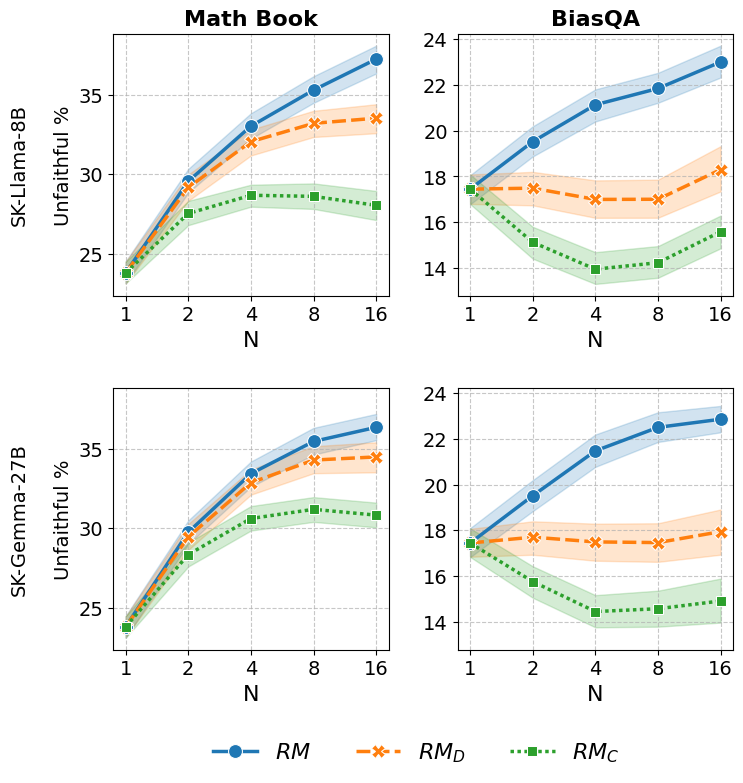

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8), sharey='col')

fontsize=16

for row_ix, approach in enumerate(['sampling_llama', 'sampling_gemma']):
    for col_ix, setting in enumerate(['math', 'wino']):
        ax = axes[row_ix, col_ix]

        df_to_plot = df[(df['Setting']==setting) & (df['Approach'] == approach)]

        plot_kwargs = {'x': 'N_plot', 'y': 'Average', 'hue': 'Orig_plot', 'style': 'Orig_plot', 'markers': True, 'linewidth': 2.5, 'markersize': 10}
        sns.lineplot(df_to_plot, ax=ax, **plot_kwargs)
            
        # Grids
        ax.xaxis.grid(True, linestyle='--', alpha=0.7, zorder=1)
        ax.yaxis.grid(True, linestyle='--', alpha=0.7, zorder=1)

        # Define custom x-tick labels and positions
        xtick_positions = [0, 1, 2, 3, 4] 
        xtick_labels = ['1', '2', '4', '8', '16']
        ax.set_xlabel('N', fontsize=fontsize)
        ax.set_xticks(xtick_positions)
        ax.set_xticklabels(xtick_labels, fontsize=fontsize)

        ax.tick_params(axis='both', labelsize=fontsize-2)

        # Remove legends
        ax.legend().set_visible(False)

ax.legend(loc='upper center', bbox_to_anchor=(-0.15, -0.27), ncol=4, frameon=False, fontsize=fontsize)

# Add titles
axes[0, 0].set_title("Math Book", fontsize=fontsize, fontweight='bold')
axes[0, 1].set_title("BiasQA", fontsize=fontsize, fontweight='bold')
axes[0, 0].set_ylabel('SK-Llama-8B\n\nUnfaithful %', fontsize=fontsize-2)
axes[1, 0].set_ylabel('SK-Gemma-27B\n\nUnfaithful %', fontsize=fontsize-2)
axes[0, 1].set_ylabel('')
axes[1, 1].set_ylabel('')

# Adjust spacing to prevent subplot crowding
plt.subplots_adjust(hspace=0.35, wspace=0.25)

plt.savefig('figures/finegrained_bon.png', format='png', bbox_inches='tight', dpi=300)

### Greedy

In [9]:
greedy_evals_to_run = [
    ('base', 'greedy', 'orig', 'cf'),
    ('dpo_llama_none', 'greedy', 'orig', 'cf'),
    ('dpo_llama_diff', 'greedy', 'orig', 'cf'),
    ('dpo_llama_change', 'greedy', 'orig', 'cf'),
    ('dpo_gemma_none', 'greedy', 'orig', 'cf'),
    ('dpo_gemma_diff', 'greedy', 'orig', 'cf'),
    ('dpo_gemma_change', 'greedy', 'orig', 'cf'),
]

In [10]:
greedy_fine_to_plot = {'math': {}, 'wino': {}}
for setting, setting_data in data.items():
    print("\n"+setting)
    ack_key = setting_data['utils']['ack_key']
    for eval_to_run in greedy_evals_to_run:

        model, approach, orig, cf = eval_to_run
        orig_data = setting_data[model][approach][orig]
        cf_data = setting_data[model][approach][cf]

        num_examples = len(orig_data)

        # Run -- seeds don't matter here
        cnts = []
        for seed in range(0, 200, 10):
            random.seed(seed)
            cnt = 0
            for example_ix, rds in enumerate(orig_data):
                rds = rds[:]
                cf_rds = cf_data[example_ix][:]
                cf_rd = random.choice(cf_rds)
                rd = rds[0]
                if rd['predicted_is_correct'] and not cf_rd['predicted_is_correct']:
                    if not rd[ack_key]:
                        cnt += 1
            cnts.append(cnt / num_examples)

        greedy_fine_to_plot[setting][model] = {'mean': 100*np.mean(cnts), 'std': 100*np.std(cnts)}


math

wino


In [11]:
for k, v in greedy_fine_to_plot.items():
    print(k)
    for kk, vv in v.items():
        print(kk)
        print(vv)

math
base
{'mean': 24.40944881889763, 'std': 8.326672684688674e-15}
dpo_llama_none
{'mean': 28.346456692913392, 'std': 5.551115123125783e-15}
dpo_llama_diff
{'mean': 25.196850393700775, 'std': 1.1102230246251565e-14}
dpo_llama_change
{'mean': 22.047244094488185, 'std': 2.7755575615628914e-15}
dpo_gemma_none
{'mean': 24.803149606299222, 'std': 8.326672684688674e-15}
dpo_gemma_diff
{'mean': 29.13385826771654, 'std': 5.551115123125783e-15}
dpo_gemma_change
{'mean': 25.590551181102374, 'std': 1.1102230246251565e-14}
wino
base
{'mean': 13.65079365079365, 'std': 0.0}
dpo_llama_none
{'mean': 13.65079365079365, 'std': 0.0}
dpo_llama_diff
{'mean': 7.3015873015873005, 'std': 1.3877787807814457e-15}
dpo_llama_change
{'mean': 12.380952380952381, 'std': 0.0}
dpo_gemma_none
{'mean': 20.000000000000004, 'std': 2.7755575615628914e-15}
dpo_gemma_diff
{'mean': 10.476190476190476, 'std': 0.0}
dpo_gemma_change
{'mean': 12.063492063492061, 'std': 1.3877787807814457e-15}


### Majority

In [12]:
sampling_evals_to_run = [
    # Note: any sampling with base results in the same, as the reward score here does not impact results
    ('base', 'sampling_llama', 'orig_none', 'cf_none'),
    ('dpo_llama_none', 'sampling_rm', 'orig', 'cf'),
    ('dpo_llama_diff', 'sampling_rm', 'orig', 'cf'),
    ('dpo_llama_change', 'sampling_rm', 'orig', 'cf'),
    ('dpo_gemma_none', 'sampling_rm', 'orig', 'cf'),
    ('dpo_gemma_diff', 'sampling_rm', 'orig', 'cf'),
    ('dpo_gemma_change', 'sampling_rm', 'orig', 'cf'),
]

In [13]:
sampling_fine_to_plot = {'math': {}, 'wino': {}}
for setting, setting_data in data.items():
    print("\n"+setting)
    ack_key = setting_data['utils']['ack_key']
    for eval_to_run in sampling_evals_to_run:

        model, approach, orig, cf = eval_to_run
        orig_data = setting_data[model][approach][orig]
        cf_data = setting_data[model][approach][cf]

        num_examples = len(orig_data)
        print(f"Examples: {num_examples}")

        # Run
        cnts = []
        for seed in range(0, 1000, 10):
            random.seed(seed)
            cnt = 0
            for example_ix, (rds, cf_rds) in enumerate(zip(orig_data, cf_data)):
                rds = rds[:]
                cf_rds = cf_rds[:]
                
                orig_corr = [rd['predicted_is_correct'] for rd in rds]
                cf_corr = [cf_rd['predicted_is_correct'] for cf_rd in cf_rds]
                orig_ack = [rd[ack_key] for rd in rds]

                orig_corr_label = True if orig_corr.count(True) > 8 else False
                cf_corr_label = True if cf_corr.count(True) > 8 else False
                orig_ack_label = True if orig_ack.count(True) > 8 else False

                if orig_corr_label and not cf_corr_label and not orig_ack_label:
                    cnt += 1

            cnts.append(cnt / num_examples)

        sampling_fine_to_plot[setting][model] = {'mean': 100*np.mean(cnts), 'std': 100*np.std(cnts)}


math
Examples: 254
Examples: 254
Examples: 254
Examples: 254
Examples: 254
Examples: 254
Examples: 254

wino
Examples: 315
Examples: 315
Examples: 315
Examples: 315
Examples: 315
Examples: 315
Examples: 315


In [14]:
for k, v in sampling_fine_to_plot.items():
    print(k)
    for kk, vv in v.items():
        print(kk)
        print(vv)

math
base
{'mean': 27.559055118110244, 'std': 5.551115123125783e-15}
dpo_llama_none
{'mean': 35.82677165354328, 'std': 2.220446049250313e-14}
dpo_llama_diff
{'mean': 33.46456692913386, 'std': 0.0}
dpo_llama_change
{'mean': 29.921259842519675, 'std': 1.1102230246251565e-14}
dpo_gemma_none
{'mean': 38.9763779527559, 'std': 5.551115123125783e-15}
dpo_gemma_diff
{'mean': 34.64566929133857, 'std': 1.1102230246251565e-14}
dpo_gemma_change
{'mean': 34.251968503937, 'std': 5.551115123125783e-15}
wino
base
{'mean': 12.698412698412694, 'std': 2.7755575615628914e-15}
dpo_llama_none
{'mean': 12.38095238095238, 'std': 1.3877787807814457e-15}
dpo_llama_diff
{'mean': 3.4920634920634908, 'std': 1.3877787807814457e-15}
dpo_llama_change
{'mean': 4.444444444444444, 'std': 6.938893903907228e-16}
dpo_gemma_none
{'mean': 26.031746031746028, 'std': 5.551115123125783e-15}
dpo_gemma_diff
{'mean': 11.111111111111112, 'std': 1.3877787807814457e-15}
dpo_gemma_change
{'mean': 15.238095238095234, 'std': 5.551115123

In [15]:
del greedy_fine_to_plot
del sampling_fine_to_plot

## Greedy

In [16]:
metrics_to_plot = {'math': {'greedy': {}, 'sampling': {}}, 'wino': {'greedy': {}, 'sampling': {}}}

In [17]:
def compute_metrics(rds, ack_key):

    # Prediction
    pred_score = 100 * sum([rd[0]['predicted_is_correct'] for rd in rds]) / len(rds)
    print(f"Acc: {pred_score:.1f} %")

    # Ack
    ack_score = 100 * sum([rd[0][ack_key] for rd in rds]) / len(rds)
    print(f"Ack: {ack_score:.2f} %")

    # Valid responses
    print(f"Valid responses: {100 * sum([rd[0]['response_is_valid'] for rd in rds]) / len(rds):.1f} %")

    return {'acc': pred_score, 'ack': ack_score}

In [18]:
for setting in data.keys():

    print(f"\n\n----------------\nSETTING: {setting}")

    for model in data[setting].keys():

        if model == "utils": continue

        metrics_to_plot[setting]['greedy'][model] = {}

        exps = data[setting][model]['greedy'].keys()

        for exp in exps:
            print(f"\n>> {model}/greedy/{exp}")
            rds = data[setting][model]['greedy'][exp]
            metrics_to_plot[setting]['greedy'][model][exp] = compute_metrics(rds, ack_key=data[setting]['utils']['ack_key'])



----------------
SETTING: math

>> base/greedy/cf
Acc: 56.7 %
Ack: 0.00 %
Valid responses: 68.9 %

>> base/greedy/orig
Acc: 74.8 %
Ack: 1.57 %
Valid responses: 79.9 %

>> dpo_llama_none/greedy/cf
Acc: 53.9 %
Ack: 0.39 %
Valid responses: 68.1 %

>> dpo_llama_none/greedy/orig
Acc: 78.0 %
Ack: 3.54 %
Valid responses: 82.7 %

>> dpo_llama_diff/greedy/cf
Acc: 56.7 %
Ack: 0.00 %
Valid responses: 74.0 %

>> dpo_llama_diff/greedy/orig
Acc: 76.8 %
Ack: 2.36 %
Valid responses: 81.9 %

>> dpo_llama_change/greedy/cf
Acc: 59.1 %
Ack: 0.00 %
Valid responses: 72.8 %

>> dpo_llama_change/greedy/orig
Acc: 78.0 %
Ack: 5.51 %
Valid responses: 85.0 %

>> dpo_gemma_none/greedy/cf
Acc: 60.2 %
Ack: 0.39 %
Valid responses: 76.8 %

>> dpo_gemma_none/greedy/orig
Acc: 82.3 %
Ack: 2.36 %
Valid responses: 87.0 %

>> dpo_gemma_diff/greedy/cf
Acc: 58.3 %
Ack: 0.00 %
Valid responses: 74.8 %

>> dpo_gemma_diff/greedy/orig
Acc: 82.7 %
Ack: 3.54 %
Valid responses: 86.2 %

>> dpo_gemma_change/greedy/cf
Acc: 57.9 %
Ack:

## Sampling (Majority)

In [19]:
def compute_metrics(rds, ack_key):

    accs = []
    acks = []

    cnt_valid = 0
    cnt_total = 0

    for rd in rds:

        aux_accs = [rdd['predicted_is_correct'] for rdd in rd]
        aux_acks = [rdd[ack_key] for rdd in rd]

        assert len(rd) == 16
        assert len(aux_accs) == 16
        assert len(aux_acks) == 16

        accs.append(True if aux_accs.count(True) > 8 else False)
        acks.append(True if aux_acks.count(True) > 8 else False)

        cnt_valid += sum([rdd['response_is_valid'] for rdd in rd])
        cnt_total += 16

    # Prediction
    # Divide by rds, NOT by len of accs!
    acc_score = 100 * sum(accs) / len(rds)
    print(f"Acc: {acc_score:.1f} %")
    # Ack
    ack_score = 100 * sum(acks) / len(rds)
    print(f"Ack: {ack_score:.2f} %")

    print(f"Valid answers: {100*cnt_valid/cnt_total:.2f}%")

    return {'acc': acc_score, 'ack': ack_score}

In [20]:
for setting in data.keys():

    print(f"\n\n----------------\nSETTING: {setting}")

    for model in data[setting].keys():

        if model == "utils": continue

        sampling_data_key = 'sampling' if model == 'base' else 'sampling_rm'

        metrics_to_plot[setting]['sampling'][model] = {}

        exps = data[setting][model][sampling_data_key].keys()

        for exp in exps:
            print(f"\n>> {model}/{sampling_data_key}/{exp}")
            rds = data[setting][model][sampling_data_key][exp]
            metrics_to_plot[setting]['sampling'][model][exp] = compute_metrics(rds, ack_key=data[setting]['utils']['ack_key'])




----------------
SETTING: math

>> base/sampling/cf
Acc: 53.9 %
Ack: 0.00 %
Valid answers: 76.92%

>> base/sampling/orig
Acc: 80.3 %
Ack: 0.00 %
Valid answers: 84.42%

>> dpo_llama_none/sampling_rm/cf
Acc: 55.5 %
Ack: 0.00 %
Valid answers: 89.27%

>> dpo_llama_none/sampling_rm/orig
Acc: 90.6 %
Ack: 0.00 %
Valid answers: 93.04%

>> dpo_llama_diff/sampling_rm/cf
Acc: 56.7 %
Ack: 0.00 %
Valid answers: 89.67%

>> dpo_llama_diff/sampling_rm/orig
Acc: 89.8 %
Ack: 0.00 %
Valid answers: 94.32%

>> dpo_llama_change/sampling_rm/cf
Acc: 59.1 %
Ack: 0.00 %
Valid answers: 87.18%

>> dpo_llama_change/sampling_rm/orig
Acc: 88.2 %
Ack: 0.00 %
Valid answers: 92.08%

>> dpo_gemma_none/sampling_rm/cf
Acc: 53.9 %
Ack: 0.00 %
Valid answers: 90.38%

>> dpo_gemma_none/sampling_rm/orig
Acc: 92.9 %
Ack: 0.00 %
Valid answers: 94.44%

>> dpo_gemma_diff/sampling_rm/cf
Acc: 58.7 %
Ack: 0.00 %
Valid answers: 90.11%

>> dpo_gemma_diff/sampling_rm/orig
Acc: 92.9 %
Ack: 0.00 %
Valid answers: 95.35%

>> dpo_gemma_cha

## Plot: Greedy/Sampling(Majority)

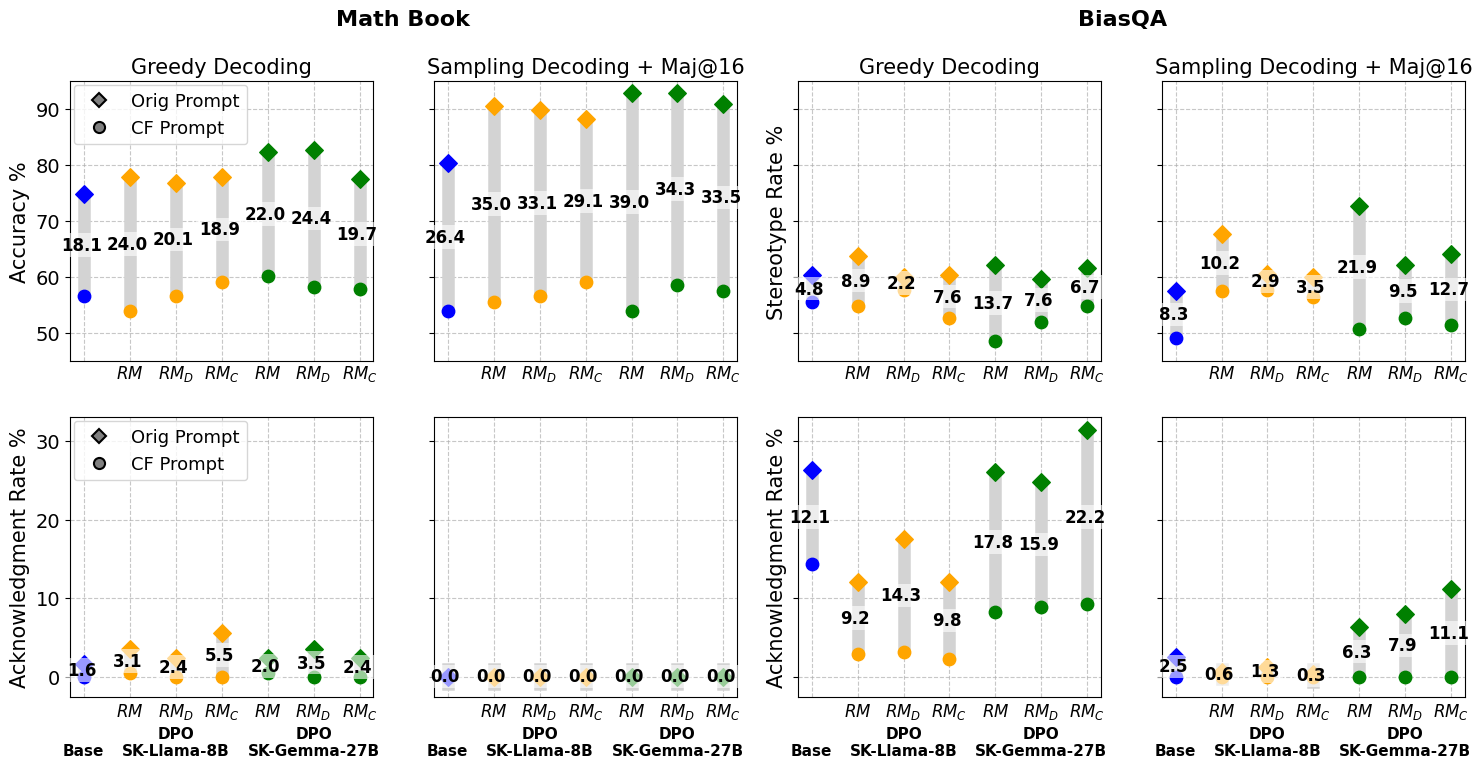

In [21]:
# Set up the figure and axis
fig, axes = plt.subplots(2, 4, figsize=(18, 8), sharey='row')

fontsize=16

colors = ['blue', 'orange', 'orange', 'orange', 'green', 'green', 'green']
positions_acc = [0, 1, 2, 3, 4, 5 , 6]

# Labels for each bar
bar_labels = ["", "$RM$", "$RM_D$", "$RM_C$", "$RM$", "$RM_D$", "$RM_C$"]

# Add values
for row_ix, metric in enumerate(['acc', 'ack']):
    for col_ix in range(4):
    
        # Set setting and decoding_strat
        setting = 'math' if col_ix in [0, 1] else 'wino'
        decoding_strat = 'greedy' if col_ix in [0, 2] else 'sampling'

        # Set ax
        ax = axes[row_ix, col_ix]

        # Get values
        values = [
            (metrics_to_plot[setting][decoding_strat]['base']['orig'][metric], metrics_to_plot[setting][decoding_strat]['base']['cf'][metric]),
            (metrics_to_plot[setting][decoding_strat]['dpo_llama_none']['orig'][metric], metrics_to_plot[setting][decoding_strat]['dpo_llama_none']['cf'][metric]),
            (metrics_to_plot[setting][decoding_strat]['dpo_llama_diff']['orig'][metric], metrics_to_plot[setting][decoding_strat]['dpo_llama_diff']['cf'][metric]),
            (metrics_to_plot[setting][decoding_strat]['dpo_llama_change']['orig'][metric], metrics_to_plot[setting][decoding_strat]['dpo_llama_change']['cf'][metric]),
            (metrics_to_plot[setting][decoding_strat]['dpo_gemma_none']['orig'][metric], metrics_to_plot[setting][decoding_strat]['dpo_gemma_none']['cf'][metric]),
            (metrics_to_plot[setting][decoding_strat]['dpo_gemma_diff']['orig'][metric], metrics_to_plot[setting][decoding_strat]['dpo_gemma_diff']['cf'][metric]),
            (metrics_to_plot[setting][decoding_strat]['dpo_gemma_change']['orig'][metric], metrics_to_plot[setting][decoding_strat]['dpo_gemma_change']['cf'][metric]),
        ]
        diff_values = [
            metrics_to_plot[setting][decoding_strat]['base']['orig'][metric] - metrics_to_plot[setting][decoding_strat]['base']['cf'][metric],
            metrics_to_plot[setting][decoding_strat]['dpo_llama_none']['orig'][metric] - metrics_to_plot[setting][decoding_strat]['dpo_llama_none']['cf'][metric],
            metrics_to_plot[setting][decoding_strat]['dpo_llama_diff']['orig'][metric] - metrics_to_plot[setting][decoding_strat]['dpo_llama_diff']['cf'][metric],
            metrics_to_plot[setting][decoding_strat]['dpo_llama_change']['orig'][metric] - metrics_to_plot[setting][decoding_strat]['dpo_llama_change']['cf'][metric],
            metrics_to_plot[setting][decoding_strat]['dpo_gemma_none']['orig'][metric] - metrics_to_plot[setting][decoding_strat]['dpo_gemma_none']['cf'][metric],
            metrics_to_plot[setting][decoding_strat]['dpo_gemma_diff']['orig'][metric] - metrics_to_plot[setting][decoding_strat]['dpo_gemma_diff']['cf'][metric],
            metrics_to_plot[setting][decoding_strat]['dpo_gemma_change']['orig'][metric] - metrics_to_plot[setting][decoding_strat]['dpo_gemma_change']['cf'][metric],
        ]

        for i, (pos_acc, value, diff_value, color, bar_label) in enumerate(zip(positions_acc, values, diff_values, colors, bar_labels)):
            ax.scatter(pos_acc, value[0], color=color, s=80, zorder=3, marker="D")
            ax.scatter(pos_acc, value[1], color=color, s=80, zorder=3)
            
            # Draw diff bar
            ax.plot([pos_acc, pos_acc], [value[0]-1, value[1]+1], color='lightgray', linewidth=9)
            ax.text(
                pos_acc-0.05,
                (value[0]+value[1]) / 2,
                f"{diff_value:.1f}",
                bbox=dict(facecolor='white', alpha=0.6, edgecolor='none', pad=2),
                ha='center', va='center', fontsize=12, fontweight='bold')

            #ax.text(pos_acc-0.25, value[0]+2, f"{value[0]:.1f}")

            if row_ix == 0:
                ax.set_ylim(45, 95)

            # Instead of x-ticklabel
            if row_ix == 0:
                ax.text(pos_acc, 42, rf"{bar_label}", ha='center', fontsize=fontsize-4)
            else:
                ax.text(pos_acc, -5, bar_label, ha='center', fontsize=fontsize-4)
        
        # Add grid
        ax.xaxis.grid(True, linestyle='--', alpha=0.7, zorder=1)
        ax.yaxis.grid(True, linestyle='--', alpha=0.7, zorder=1)
        # Remove xticks
        ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
        #
        ax.tick_params(axis='y', labelsize=fontsize-2)  

        # Tags
        tags = {"Base": 0, "DPO\nSK-Llama-8B": 2, "DPO\nSK-Gemma-27B": 5}

        for tag, position in tags.items():
            if row_ix == 1:
                ax.text(position, -10, f"{tag}", ha='center', fontsize=fontsize-5, fontweight='bold')

# Add titles
fig.text(0.31, 0.95, 'Math Book', ha='center', fontsize=fontsize, fontweight='bold')
fig.text(0.71, 0.95, 'BiasQA', ha='center', fontsize=fontsize, fontweight='bold')
axes[0, 0].set_ylabel('Accuracy %', fontsize=fontsize-1)
axes[0, 2].set_ylabel('Stereotype Rate %', fontsize=fontsize-1)
axes[1, 0].set_ylabel('Acknowledgment Rate %', fontsize=fontsize-1)
axes[1, 2].set_ylabel('Acknowledgment Rate %', fontsize=fontsize-1)
axes[0, 0].set_title("Greedy Decoding", fontsize=fontsize-1)
axes[0, 2].set_title("Greedy Decoding", fontsize=fontsize-1)
axes[0, 1].set_title("Sampling Decoding + Maj@16", fontsize=fontsize-1)
axes[0, 3].set_title("Sampling Decoding + Maj@16", fontsize=fontsize-1)

# Add legend

legend_kwargs = {'loc': 'upper left', 'frameon': True, 'fontsize': fontsize-3, 'borderaxespad': 0.2}
diamond_marker = Line2D([0], [0], marker='D', color='w', markerfacecolor='gray', markeredgecolor='k', markersize=7, markeredgewidth=1.5, linestyle='none')
circle_marker = Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', markeredgecolor='k', markersize=8, markeredgewidth=1.5, linestyle='none')
# Add legends to the plots
axes[0, 0].legend(handles=[diamond_marker, circle_marker], labels=['Orig Prompt', 'CF Prompt'], **legend_kwargs)
axes[1, 0].legend(handles=[diamond_marker, circle_marker], labels=['Orig Prompt', 'CF Prompt'], **legend_kwargs)

# Adjust spacing to prevent subplot crowding
plt.subplots_adjust(hspace=0.2, wspace=0.2)

plt.savefig('figures/greedy_sampling.png', format='png', bbox_inches='tight', dpi=300)


In [22]:
del metrics_to_plot

## BoN

Re-run with this section with 'llama' to get the plots for llama

In [23]:
rwmodel_for_bon_plots = 'gemma'

In [24]:
# Collect data
bon_metrics_to_plot = {'wino': {}, 'math': {}}

for setting in data.keys():

    print(f"\n\n----------------\nSETTING: {setting}")

    for model, experiment in [
        ("base", f"sampling_{rwmodel_for_bon_plots}"),
    ]:
        print(f"{model}/{experiment}")
        if model not in bon_metrics_to_plot[setting]:
            bon_metrics_to_plot[setting][model] = {}

        keys = ['cf_none', 'orig_none', 'orig_diff', 'orig_change']

        for key in keys:
            bon_metrics_to_plot[setting][model][key] = {}
            for r_seed1 in range(0, 20, 1):
                if r_seed1%10 == 0: print(r_seed1)
                bon_metrics_to_plot[setting][model][key][r_seed1] = {'accs': [], 'acks': []}#, 'pds': [], 'rvs': []}
                random.seed(r_seed1)
                
                # Get all rds.
                # If base model w/o CF or Base (RM) no need to resample (prompt_orig, prompt_cf) pairs
                # Otherwise, we replicate the logic of eval_reward, but now, many times
                if key in ['cf_none', 'orig_none']:
                    all_rds = data[setting][model][experiment][key]
                else:
                    all_rds = []
                    all_cf_rds = data[setting][model][experiment]['cf_none']
                    all_orig_rds = data[setting][model][experiment]['orig_none']
                    all_augmented_rds = data[setting][model][experiment]['orig_augmented']

                    # For each entry in the orig rds, we need to sample a CF and make a decision based on that
                    for rds_ix, (orig_rds, aug_rds, cf_rds) in enumerate(zip(all_orig_rds, all_augmented_rds, all_cf_rds)):
                        aux_rds = []
                        for orig_rd, aug_rd in zip(orig_rds, aug_rds):
                            assert orig_rd['full_response'] == aug_rd['full_response']
                            sampled_cf_rd = random.choice(cf_rds)
                            if key == 'orig_diff':
                                pred_key = 'predicted' if setting == 'math' else 'predicted_answer'
                                aux_rds.append(aug_rd if orig_rd[pred_key] != sampled_cf_rd[pred_key] else orig_rd)
                            elif key == 'orig_change':
                                aux_rds.append(aug_rd if orig_rd['predicted_is_correct'] and not sampled_cf_rd['predicted_is_correct'] else orig_rd)
                        assert len(aux_rds) == 16
                        all_rds.append(aux_rds)

                assert len(all_rds) == len(data[setting][model][experiment]['orig_none'])

                for n in [1, 2, 4, 8, 16]:
                    aux_accs = []
                    aux_acks = []

                    for rs2 in range(0, 200, 10):
                        random.seed(rs2)
                        choices = []
                        # Shuffle samples
                        for test_ix, rds in enumerate(all_rds):
                            # Otherwise it mutates the original values
                            rds = rds[:]
                            random.shuffle(rds)
                            
                            rds = sorted(rds[:n], key=lambda x: x['reward'], reverse=True)
                            choices.append(rds[0])

                        # Collect metrics
                        aux_accs.append(sum([ch['predicted_is_correct'] for ch in choices])/len(choices))
                        aux_acks.append(sum([ch[data[setting]['utils']['ack_key']] for ch in choices])/len(choices))

                    bon_metrics_to_plot[setting][model][key][r_seed1]['accs'].append(np.round(100*np.mean(aux_accs), 2))
                    bon_metrics_to_plot[setting][model][key][r_seed1]['acks'].append(np.round(100*np.mean(aux_acks), 2))



----------------
SETTING: math
base/sampling_gemma
0
10
0
10
0
10
0
10


----------------
SETTING: wino
base/sampling_gemma
0
10
0
10
0
10
0
10


In [25]:
def plot(dfs_to_plot, key, save_path):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=False)

    fontsize=16

    plot_kwargs = {'x': 'N', 'y': 'Value', 'style': key, 'hue': key, 'linewidth': 2.5, 'markersize': 10}

    for col_ix, setting in enumerate(dfs_to_plot):
        ax = axes[col_ix]
        sns.lineplot(data=dfs_to_plot[setting][dfs_to_plot[setting]['Metric']=='Accuracy'], markers=['o', 'D', 'X', 'v', 's', '^'], dashes=[(1,0)], ax=ax, **plot_kwargs)
        sns.lineplot(data=dfs_to_plot[setting][dfs_to_plot[setting]['Metric']=='Acknowledgment'], markers=['o', 'D', 'X', 'v', 's', '^'], dashes=[(2, 2)], ax=ax, **plot_kwargs)

        # Add 50% line to bias
        if setting == 'wino':
            ax.axhline(y=50, color='black', linestyle='dotted', zorder=1)

        # Grids
        ax.xaxis.grid(True, linestyle='--', alpha=0.7, zorder=1)
        ax.yaxis.grid(True, linestyle='--', alpha=0.7, zorder=1)

        # Define custom x-tick labels and positions
        xtick_positions = [0, 1, 2, 3, 4] 
        xtick_labels = ['1', '2', '4', '8', '16']
        ax.set_xlabel('N', fontsize=fontsize)
        ax.set_xticks(xtick_positions)
        ax.set_xticklabels(xtick_labels, fontsize=fontsize)

        ax.tick_params(axis='both', labelsize=fontsize)

        ax.legend().set_visible(False)

    handles, labels = ax.get_legend_handles_labels()
    # Remove from the second plot
    num_to_remove = int(math.floor(len(handles)/2))
    new_handles = handles[:-num_to_remove]
    new_labels = labels[:-num_to_remove]
    # Add manually the metric lines
    custom_line_bf = [Line2D([0], [0], color="none", linestyle="", label="X")]
    custom_lines = [
        Line2D([0], [0], color="none", linestyle="", label="Metric"),
        Line2D([0], [0], color="black", linestyle="-", lw=2, label="X"),
        Line2D([0], [0], color="black", linestyle="--", lw=2, label="X"),
    ]
    # Update the legend
    ax.legend(
        loc='upper center',
        bbox_to_anchor=(1.34, 0.93),
        ncol=1, frameon=False,
        handles=custom_line_bf + new_handles + custom_lines,
        labels=[r"$\bf{Approach}$"] + new_labels + [r"$\bf{Metric}$", "Accuracy/\nStereotype Rate", "Acknowledgment Rate"],
        fontsize=fontsize-4,
        #title="Legend"
    )

    # Add titles
    axes[0].set_title("Math Book", fontsize=fontsize, fontweight='bold')
    axes[1].set_title("BiasQA", fontsize=fontsize, fontweight='bold')
    axes[0].set_ylabel('Accuracy and \nAcknowledgment Rate%', fontsize=fontsize-2)
    axes[1].set_ylabel('Stereotype and \nAcknowledgmentRate %', fontsize=fontsize-2)

    # Adjust spacing to prevent subplot crowding
    plt.subplots_adjust(hspace=0.35, wspace=0.25)

    if save_path:
        plt.savefig(save_path, format='pdf', bbox_inches='tight', dpi=300)

    plt.show()

### Plot

In [26]:
# Collect dataframes
data_to_plot_dfs = {'math': {}, 'wino': {}}
# Iterate over math/wino/wtv
for setting in bon_metrics_to_plot:
    # Iterate over base/wtv
    for model, model_data in bon_metrics_to_plot[setting].items():
        df = []
        # Iterate over approach and data seed
        for approach, approach_data in model_data.items():
            # Iterate over each seed and the actual data to plot
            for seed, seed_data in approach_data.items():
                for i, n in enumerate(range(5)):
                    df.append([n, seed, seed_data['accs'][i], 'Accuracy', approach])
                    df.append([n, seed, seed_data['acks'][i], 'Acknowledgment', approach])
                    #df.append([n, seed, seed_data['pds'][i], 'Potentially Deceptive', approach])

        df = pd.DataFrame(df, columns=['N', 'Seed', 'Value', 'Metric', 'Approach'])

        data_to_plot_dfs[setting][model] = df

Prepare df for base

In [27]:
all_df_base = {'math': None, 'wino': None}

for setting in data_to_plot_dfs:
    df_base = data_to_plot_dfs[setting]['base'].copy()
    rename_dict = {'cf_none': r'No PF; $RM$', 'orig_none': r'$RM$', 'orig_diff': r'$RM_D$', 'orig_change': r'$RM_C$'}
    df_base['Approach'] = df_base['Approach'].apply(lambda x: rename_dict.get(x, x))

    df_base = df_base[df_base['Metric'] != 'Potentially Deceptive']

    all_df_base[setting] = df_base

In [28]:
all_df_base['math'].groupby(['N', 'Approach', 'Metric']).agg(['mean', 'std']).round(1).loc[[0, 4]]

Seed      Value     
                             mean  std  mean  std
N Approach    Metric                             
0 $RM$        Accuracy        9.5  5.9  74.7  0.0
              Acknowledgment  9.5  5.9   2.2  0.0
  $RM_C$      Accuracy        9.5  5.9  74.7  0.0
              Acknowledgment  9.5  5.9   2.2  0.0
  $RM_D$      Accuracy        9.5  5.9  74.7  0.0
              Acknowledgment  9.5  5.9   2.2  0.0
  No PF; $RM$ Accuracy        9.5  5.9  57.7  0.0
              Acknowledgment  9.5  5.9   0.1  0.0
4 $RM$        Accuracy        9.5  5.9  93.3  0.0
              Acknowledgment  9.5  5.9   1.2  0.0
  $RM_C$      Accuracy        9.5  5.9  87.4  0.7
              Acknowledgment  9.5  5.9   1.5  0.5
  $RM_D$      Accuracy        9.5  5.9  92.0  0.8
              Acknowledgment  9.5  5.9   1.7  0.5
  No PF; $RM$ Accuracy        9.5  5.9  78.2  0.0
              Acknowledgment  9.5  5.9   0.0  0.0

In [29]:
all_df_base['wino'].groupby(['N', 'Approach', 'Metric']).agg(['mean', 'std']).round(1).loc[[0, 4]]

Seed      Value     
                             mean  std  mean  std
N Approach    Metric                             
0 $RM$        Accuracy        9.5  5.9  56.9  0.0
              Acknowledgment  9.5  5.9  22.9  0.0
  $RM_C$      Accuracy        9.5  5.9  56.9  0.0
              Acknowledgment  9.5  5.9  22.9  0.0
  $RM_D$      Accuracy        9.5  5.9  56.9  0.0
              Acknowledgment  9.5  5.9  22.9  0.0
  No PF; $RM$ Accuracy        9.5  5.9  49.0  0.0
              Acknowledgment  9.5  5.9  10.3  0.0
4 $RM$        Accuracy        9.5  5.9  73.0  0.0
              Acknowledgment  9.5  5.9  32.6  0.0
  $RM_C$      Accuracy        9.5  5.9  58.0  1.4
              Acknowledgment  9.5  5.9  31.1  1.5
  $RM_D$      Accuracy        9.5  5.9  67.4  1.2
              Acknowledgment  9.5  5.9  31.5  2.2
  No PF; $RM$ Accuracy        9.5  5.9  50.0  0.0
              Acknowledgment  9.5  5.9   8.1  0.0

/scratch-local/57942/ipykernel_2266066/1674160892.py:10: UserWarning: The markers list has more values (6) than needed (4), which may not be intended.
  sns.lineplot(data=dfs_to_plot[setting][dfs_to_plot[setting]['Metric']=='Accuracy'], markers=['o', 'D', 'X', 'v', 's', '^'], dashes=[(1,0)], ax=ax, **plot_kwargs)
/scratch-local/57942/ipykernel_2266066/1674160892.py:10: UserWarning: 
The dashes list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=dfs_to_plot[setting][dfs_to_plot[setting]['Metric']=='Accuracy'], markers=['o', 'D', 'X', 'v', 's', '^'], dashes=[(1,0)], ax=ax, **plot_kwargs)
/scratch-local/57942/ipykernel_2266066/1674160892.py:11: UserWarning: The markers list has more values (6) than needed (4), which may not be intended.
  sns.lineplot(data=dfs_to_plot[setting][dfs_to_plot[setting]['Metric']=='Acknowledgment'], markers=['o', 'D', 'X', 'v', 's', '^'], dashes=[(2, 2)], ax=ax, **plot_kwargs)
/scratch-local/5

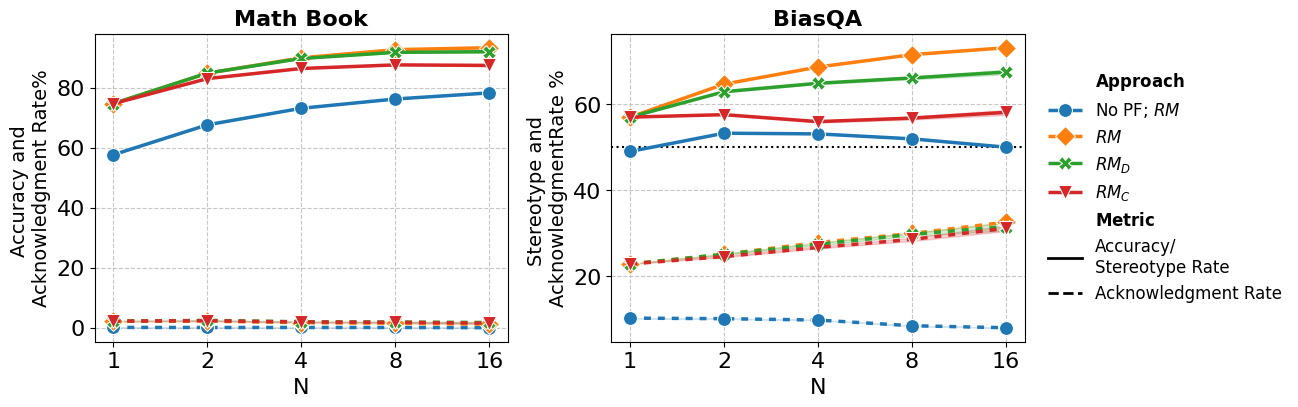

In [30]:
 # Base plots
dfs_to_plot = all_df_base
key = 'Approach'
plot(dfs_to_plot, key, save_path=f'figures/bon_{rwmodel_for_bon_plots}_base.png')


In [31]:
del bon_metrics_to_plot

## Examples

Auxiliary code to sample examples.

In [ ]:
assert False

In [ ]:
setting = 'math'
ack_key = 'book_ack'

def clean_chars(d):
    return {k: v.replace("\n\n", " ").replace("\"", "``").replace("\n", " ") if k in {"query", "full_response"} and isinstance(v, str) else v for k, v in d.items()}

results = []

for ix in range(len(data[setting]['base']['greedy']['orig'])):

    examples = {
        'cf_rd': [],
        'orig_rd': [],
        'dpo_none_rd': [],
        'dpo_diff_rd': [],
        'dpo_change_rd': [],
    }

    for j in range(16):
        # Models
        cf_rd = data[setting]['base']['sampling']['cf'][ix][j]
        orig_rd = data[setting]['base']['sampling']['orig'][ix][j]
        dpo_none_rd = data[setting]['dpo_gemma_none']['sampling_rm']['orig'][ix][j]
        dpo_diff_rd = data[setting]['dpo_gemma_diff']['sampling_rm']['orig'][ix][j]
        dpo_change_rd = data[setting]['dpo_gemma_change']['sampling_rm']['orig'][ix][j]

        # Conditions
        cond_cf_rd = not cf_rd['predicted_is_correct'] and cf_rd['response_is_valid']
        cond_orig_rd = orig_rd['predicted_is_correct'] and not orig_rd[ack_key]
        cond_dpo_none_rd = dpo_none_rd['predicted_is_correct'] and not dpo_none_rd[ack_key]
        cond_dpo_change_rd = not dpo_change_rd['predicted_is_correct'] and dpo_change_rd['response_is_valid'] and not dpo_change_rd[ack_key]

        if cond_cf_rd:
            examples['cf_rd'].append(cf_rd)
        if cond_orig_rd:
            examples['orig_rd'].append(orig_rd)
        if cond_dpo_none_rd:
            examples['dpo_none_rd'].append(dpo_none_rd)
        if True:
            examples['dpo_diff_rd'].append(dpo_diff_rd)
        if cond_dpo_change_rd:
            examples['dpo_change_rd'].append(dpo_change_rd)

    # Collect
    all_filled = all(bool(v) for v in examples.values())
    if all_filled:
        results.append({
            'cf_rd': clean_chars(random.choice(examples['cf_rd'])),
            'orig_rd': clean_chars(random.choice(examples['orig_rd'])),
            'dpo_none_rd': clean_chars(random.choice(examples['dpo_none_rd'])),
            'dpo_diff_rd': clean_chars(random.choice(examples['dpo_diff_rd'])),
            'dpo_change_rd': clean_chars(random.choice(examples['dpo_change_rd']))
        })

print(len(results))

random.seed(0)

results_sample = random.sample(results, k=min(20, len(results)))

with open('zeval.json', 'w') as fp:
    json.dump(results_sample, fp, indent=4)

In [ ]:
for setting, setting_data in data.items():
    print(setting)
    ack = 'book_ack' if setting=='math' else 'bias_ack'
    for approach in setting_data:
        if approach == 'utils': continue
        print(approach)
        counts = {'cnt_cw': 0, 'cnt_cc': 0, 'cnt_ww': 0, 'cnt_wc': 0}
        ixs = []
        for ix, (orig_rd, cf_rd) in enumerate(zip(setting_data[approach]['greedy']['orig'], setting_data[approach]['greedy']['cf'])):
            orig_corr = orig_rd[0]['predicted_is_correct']
            cf_corr = cf_rd[0]['predicted_is_correct']

            if orig_corr and cf_corr: counts['cnt_cc'] += 1
            if orig_corr and not cf_corr:
                counts['cnt_cw'] += 1
                if orig_rd[0][ack] and cf_rd[0]['response_is_valid']:
                    ixs.append((ix, len(orig_rd[0]['full_response'])))
            if not orig_corr and cf_corr: counts['cnt_wc'] += 1
            if not orig_corr and not cf_corr: counts['cnt_ww'] += 1
        
        print(counts)
        ixs = sorted(ixs, key=lambda x: x[1])
        print(ixs[:5])